In [281]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re


In [282]:
df = pd.read_csv('googleplaystore.csv')
df.head()



,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Knowing Dataset

In [283]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [284]:
df.shape

(10841, 13)

In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [286]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [287]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## Cleaning Dataset

#### Task 1: Lower case columns name

In [288]:
df.columns = [x.lower() for x in df.columns]
df.columns

Index(['app', 'category', 'rating', 'reviews', 'size', 'installs', 'type',
       'price', 'content rating', 'genres', 'last updated', 'current ver',
       'android ver'],
      dtype='object')

#### Task 2: Change column date type to numrical.

Below columns contains the numerical data type but in the form of object. In this task will be change it into interger/float dtypes.

But we change it's datatyep, we will remove and replace data where it is necessary.

In [289]:
df[['reviews','size','installs','price','current ver', 'android ver']]

,reviews,size,installs,price,current ver,android ver
0,159,19M,"10,000+",0,1.0.0,4.0.3 and up
1,967,14M,"500,000+",0,2.0.0,4.0.3 and up
2,87510,8.7M,"5,000,000+",0,1.2.4,4.0.3 and up
3,215644,25M,"50,000,000+",0,Varies with device,4.2 and up
4,967,2.8M,"100,000+",0,1.1,4.4 and up
...,...,...,...,...,...,...
10836,38,53M,"5,000+",0,1.48,4.1 and up
10837,4,3.6M,100+,0,1.0,4.1 and up
10838,3,9.5M,"1,000+",0,1.0,2.2 and up
10839,114,Varies with device,"1,000+",0,Varies with device,Varies with device


#### Reviews columns

In [290]:
df[df['reviews'].str.contains('[A-Z]', flags=re.I)]

,app,category,rating,reviews,size,installs,type,price,content rating,genres,last updated,current ver,android ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


As you can see, at index 10472, there is 3.0M reviews. Which can't be true. With careful observation we can see that, the apps category type is missing in this row and other columns value is push to the next left column.

If we check this particular apps in Google play station.It's fall under 'Lifestyle' category.

Now, We will update with category and other respected columns. 

In [291]:
result  = df.iloc[10472].values.tolist()
result.insert(1, 'Lifestyle')
result.pop()
df.iloc[10472] = result
df.iloc[10472]

app               Life Made WI-Fi Touchscreen Photo Frame
category                                        Lifestyle
rating                                                1.9
reviews                                                19
size                                                 3.0M
installs                                           1,000+
type                                                 Free
price                                                   0
content rating                                   Everyone
genres                                                NaN
last updated                            February 11, 2018
current ver                                        1.0.19
android ver                                    4.0 and up
Name: 10472, dtype: object

In [292]:
df['reviews'] = df['reviews'].astype(int)

#### Size column

In 'size' columns. There is no specific size for few apps. Of this analysis purpose we will consider those apps having 10.0M size.

In [293]:
df['size'] = df['size'].apply(lambda x : '10.0' if x == 'Varies with device' else x.replace('M', ""))
df['size'] = df['size'].apply(lambda x : x.replace('K', ""))
df['size'] = df['size'].apply(lambda x : x.replace('k', ""))
df['size'] = df['size'].astype(float)

#### Installs Column.

In [294]:
df['installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [295]:
df['installs'] = df['installs'].apply(lambda x : x.replace('+', ''))
df['installs'] = df['installs'].apply(lambda x : x.replace(',', ''))
df['installs'] = df['installs'].astype(int)

#### Price column.

In [296]:
df['price'] = df['price'].apply(lambda x : x.replace('$', ''))
df['price'] = df['price'].astype(float)

In [297]:
df['price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

## Data Analysing

####  Task 1: Dublicate apps

Here we will find the all the dublicate apps name. We will keep the unique apps with highest reviews for each.

In [298]:
apps = df.app
dublicate_apps = []
unique_apps = []

for each in apps:
    if each in unique_apps:
        dublicate_apps.append(each)
    else:
        unique_apps.append(each)
        
print('Total Dublicate apps : ', len(dublicate_apps))
print('Total unique apps : ', len(unique_apps))

Total Dublicate apps :  1181
Total unique apps :  9660


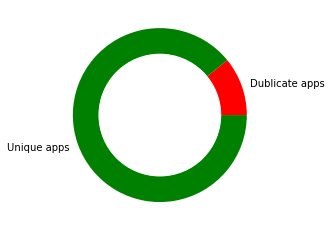

In [310]:
plt.pie([len(dublicate_apps),len(unique_apps)], labels=['Dublicate apps','Unique apps'], colors=['red', 'green'])
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

Before removing dublicate apps. We want to find unique apps with higest reviews.

In [313]:
reviews_max = {}

Google_clean = []
Google_already_added = []

for index, value in df.iterrows():
    result = value.tolist()
    app_name = result[0]
    app_reviews = result[3]
    
    if app_name in reviews_max and reviews_max[app_name] < app_reviews:
            reviews_max[app_name] = app_reviews
    elif app_name not in reviews_max:
            reviews_max[app_name] = app_reviews

    if reviews_max[app_name] == app_reviews and (app_name not in Google_already_added):
        Google_clean.append(value)
        Google_already_added.append(app_name)

In [362]:
df = pd.DataFrame(Google_clean, index = range(len(Google_clean)))
print('Total columns: ', len(df))

Total columns:  9660


Finally, We managed to remove the dublicate apps from dataset. We dataset has be assigned with unique 9960 rows. 

#### Task 2: English vs Foreign apps

Here, We will find out how many apps are for English audience Vs Foreign audience.

We will check first 3 letters of apps. If first 3 letters are not english standard character then we will consider them as foreign apps.

In [363]:
def check_character(string):
    non_english_character = 0
    
    for character in string:
        if ord(character) > 127:
            non_english_character += 1
    
    if non_english_character > 3:
        return False
    else:
        return True

df['app_origin'] = df['app'].apply(lambda x : 'English' if check_character(x) else 'Foreign')

In [364]:
df.app_origin.value_counts()

English    9615
Foreign      45
Name: app_origin, dtype: int64

In [365]:
df.loc[df['app_origin']=='Foreign'].head()

,app,category,rating,reviews,size,installs,type,price,content rating,genres,last updated,current ver,android ver,app_origin
583,Flame - درب عقلك يوميا,EDUCATION,4.6,56065,37.0,1000000,Free,0.0,Everyone,Education,"July 26, 2018",3.3,4.1 and up,Foreign
1304,သိင်္ Astrology - Min Thein Kha BayDin,LIFESTYLE,4.7,2225,15.0,100000,Free,0.0,Everyone,Lifestyle,"July 26, 2018",4.2.1,4.0.3 and up,Foreign
2991,РИА Новости,NEWS_AND_MAGAZINES,4.5,44274,8.0,1000000,Free,0.0,Everyone,News & Magazines,"August 6, 2018",4.0.6,4.4 and up,Foreign
3323,صور حرف H,ART_AND_DESIGN,4.4,13,4.5,1000,Free,0.0,Everyone,Art & Design,"March 27, 2018",2.0,4.0.3 and up,Foreign
3431,"L.POINT - 엘포인트 [ 포인트, 멤버십, 적립, 사용, 모바일 카드, 쿠폰,...",LIFESTYLE,4,45224,49.0,5000000,Free,0.0,Everyone,Lifestyle,"August 1, 2018",6.5.1,4.1 and up,Foreign


There are 45 Foreign apps in google play store.

#### Task 4: Total apps by category.

In [366]:
cats = df.category.value_counts()
cats

FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
ART_AND_DESIGN           64
EVENTS                   64
PARENTING                60
COMICS                   56
BEAUTY                   53
Lifestyle                 1
Name: category, dtype: int64

Family, Game and Tools are top 3 where as Comics, Beauty and Lifestyle are least 3.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 34 Text major ticklabel objects>)

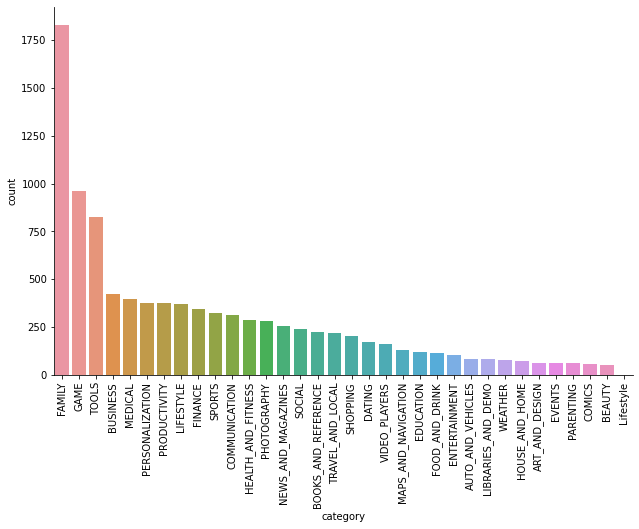

In [367]:
g = sns.catplot(x='category', kind='count', data=df, order=df.category.value_counts().index)

g.fig.set_figwidth(10)
g.fig.set_figheight(6)
plt.xticks(rotation=90)

#### Task 5: Apps rating.

In [380]:
rat = df.rating.value_counts()
rat

4.3    897
4.4    895
4.5    848
4.2    810
4.6    683
4.1    621
4.0    513
4.7    442
3.9    359
3.8    286
5.0    271
3.7    224
4.8    221
3.6    167
3.5    156
3.4    126
3.3    100
4.9     85
3.0     81
3.1     69
3.2     63
2.9     45
2.8     40
2.6     24
2.7     23
2.5     20
2.3     20
2.4     19
1.0     16
2.2     14
2.0     12
1.9     11
1.8      8
1.7      8
2.1      8
1.6      4
1.5      3
1.4      3
1.9      1
1.2      1
Name: rating, dtype: int64

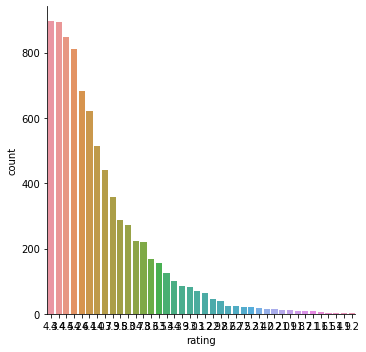

In [388]:
sns.catplot(x='rating', kind='count', data=df, order = df.rating.value_counts().index)
g.fig.set_figwidth(15)
g.fig.set_figheight(6)
